In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
SPY = pd.read_csv('SPY.csv')
SPY['Date'] = pd.to_datetime(SPY['Date'])  # Convert 'Date' column to datetime
SPY = SPY.set_index('Date')
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819855,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100
...,...,...,...,...,...,...
2023-10-30,413.559998,416.679993,412.220001,415.589996,415.589996,86562700
2023-10-31,416.179993,418.529999,414.209991,418.200012,418.200012,79665200
2023-11-01,419.200012,423.500000,418.649994,422.660004,422.660004,98068100


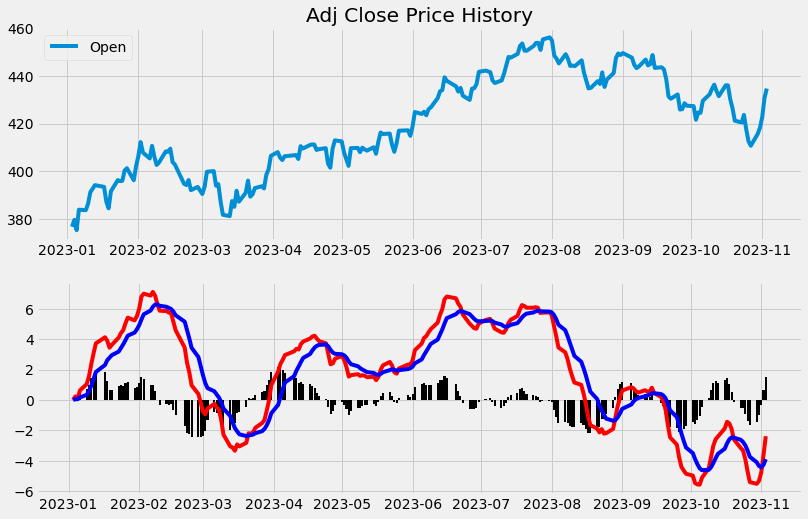

In [14]:
ShortEMA = SPY.Close.ewm(span=12, adjust = False).mean()
LongEMA = SPY.Close.ewm(span=26, adjust = False).mean()
MACD = ShortEMA - LongEMA 
signal = MACD.ewm(span=9, adjust = False).mean()

# Create a figure and axes for the entire plot
fig, ax = plt.subplots(2, 1, figsize=(12.2, 8))

# Plot Adj Close Prices
ax[0].plot(SPY.index, SPY['Adj Close'])
ax[0].set_title('Adj Close Price History')
ax[0].legend(SPY.columns.values, loc='upper left')

# Plot MACD and Signal Line
ax[1].plot(SPY.index, MACD, label='SPY MACD', color='red')
ax[1].plot(SPY.index, signal, label='Signal Line', color='blue')

# Plot MACD Histogram
macd_histogram = MACD - signal
bar_width = 0.9
ax[1].bar(SPY.index, macd_histogram, label='MACD Histogram', color='black', alpha=1, width=bar_width)

plt.show()

In [11]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots

# Create a Plotly subplot with two charts
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Add Adj Close Price History
fig.add_trace(go.Scatter(x=SPY.index, y=SPY['Adj Close'], mode='lines', name='Adj Close Price History'), row=1, col=1)

# Add SPY MACD and Signal Line
fig.add_trace(go.Scatter(x=SPY.index, y=MACD, mode='lines', name='SPY MACD', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=SPY.index, y=signal, mode='lines', name='Signal Line', line=dict(color='blue')), row=2, col=1)

# Add the vertical line
fig.add_shape(dict(type="line", x0=vertical_line_date, x1=vertical_line_date, y0=min(MACD), y1=max(MACD), line=dict(color="green", width=2, dash="dash"), xref="x", yref="y"), row=1, col=1)

# Create the MACD Histogram using a Bar trace
fig.add_trace(go.Bar(x=SPY.index, y=macd_histogram, name='MACD Histogram', marker=dict(color='black')), row=2, col=1)

# Customize the y-axis of the SPY chart
fig.update_yaxes(title_text="Price", row=1, col=1, range=[370, 500])  # Adjust the range as needed

fig.update_layout(showlegend=True)  # Hide the legend
fig.update_layout(height=800, width=1000) 

fig.show()
            